In [133]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sparrow.tools.path import get_workspace_path
business_file=open(get_workspace_path("source/sparrow/feature/binning")+"dataset/yelp/yelp_academic_dataset_business.json")
business_data_frame=pd.DataFrame([json.loads(x) for x in business_file.readlines()])
business_file.close()
print(business_data_frame)

                  business_id  \
0      Iu-oeVzv8ZgP18NIB0UMqg   
1      ae5tm46-ewAhUJ6HR4fXFA   
2      lb9qELwduFgBo408x2VKOA   
3      HPWmjuivv3xJ279qSVfNaQ   
4      DARh6yjrGGVZ7R3Gdh4CMA   
...                       ...   
13485  gYMhUx_NSheqhvD3agJ8fg   
13486  4cSt8JnzwvD7cLNBtYXhlg   
13487  O5jX_6rUv-Fn9yFYLLHp_g   
13488  MUOQiWEblJRsjIfRsC6Ofw   
13489  8HqUl6witSBb156Kohx74A   

                                            full_address  \
0      3320 S Hill St\nSouth East LA\nLos Angeles, CA...   
1      12 Arrow St\nSte 108\nHarvard Square\nCambridg...   
2             19 King St E\n2nd floor\nKitchener, ON N2G   
3               325 W State St\nWest Lafayette, IN 47906   
4      2803 San Jacinto Blvd\nUniversity of Texas\nAu...   
...                                                  ...   
13485  3335 S Figueroa St\nUGY4\nSouth Los Angeles\nL...   
13486  2236 S Figueroa St\nSouth Los Angeles\nLos Ang...   
13487  303 Detroit St\nKerrytown Ann Arbor\nAnn Arbor...   
134

分位数
0.82    32.0
0.89    58.0
0.93    88.0
Name: review_count, dtype: float64


Text(0, 0.5, 'occurrence')

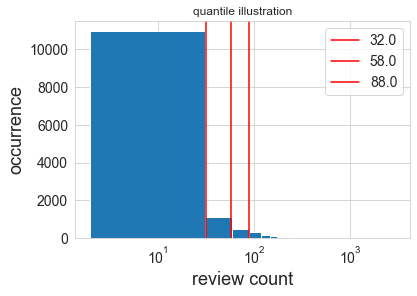

In [138]:
business_data_quantile=business_data_frame['review_count'].quantile([0.82,0.89,0.93])
print("分位数")
print(business_data_quantile)
sns.set_style("whitegrid")
fig, ax= plt.subplots() #Figure,Axes 坐标粙 
plt.title("quantile illustration")
business_data_frame['review_count']\
    .hist(ax=ax,bins=100)
x_legend=[]
x_legend_label=[]

for pos in business_data_quantile:
    x_legend.append(plt.axvline(pos,color='r'))
    x_legend_label.append(pos)

ax.legend(x_legend,x_legend_label,fontsize=14)

#ax.set_yscale('log')
ax.set_xscale("log")
ax.tick_params(labelsize=14)
ax.set_xlabel("review count",fontsize=18)
ax.set_ylabel("occurrence",fontsize=18)

In [135]:
#分位数映射
import pandas as pd

quantile_count=[11,33,22,66,55,77]
quantile_mapping= pd.qcut(quantile_count,2,labels=False)
print("quantile count data")
print(quantile_count)
print("quantile mapping")
print(quantile_mapping)
#将一维数据转成一列矩阵
print("series")
series=pd.Series(quantile_count)
print(series)
quantile_result=series.quantile([0.1,0.2,0.3,0.4,0.5])
print("quantile result")
print(quantile_result)

# quantile_result=series.quantile([0.4])
# print("quantile result 40%")
# print(quantile_result)

quantile count data
[11, 33, 22, 66, 55, 77]
quantile mapping
[0 0 0 1 1 1]
series
0    11
1    33
2    22
3    66
4    55
5    77
dtype: int64
quantile result
0.1    16.5
0.2    22.0
0.3    27.5
0.4    33.0
0.5    44.0
dtype: float64
